# **UTS - KNN & DECISSION TREE**

In [1]:
# import library yang diperlukan
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#import dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


## **Eksplorasi data**
mengetahui data apa saja yang akan di klasifikasi dan mengetahui ukuran data yang akan di olah

In [23]:
dataset.info

<bound method DataFrame.info of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.0

In [11]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [13]:
dataset.shape

(116, 10)

membagi data input dan diklasifikasi

In [14]:
X = dataset.drop(columns=["Classification"]).values
y = dataset.Classification

## **Splitting Dataset**
melakukan splitting pada dataset yang digunakan untuk membagi data latih dan data uji, dan digunakan untuk menghitung akurasi model klasifikasi

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(92, 9)
(24, 9)
(92,)
(24,)


## **Feature Scalling**
langkah ini dilakukan untuk agar jarak data dapat diprediksi dengan baik

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **K-Nearest Neighbor (KNN)**
Algoritme k tetangga terdekat adalah sebuah metode untuk melakukan klasifikasi terhadap objek berdasarkan data pemelajaran yang jaraknya paling dekat dengan objek tersebut. 

membuat klasifikasi KNN menggunakan nilai K = 3

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn3.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

menghitung akurasi dari model KNN

In [31]:
print("Score data latih  :", knn3.score(X_train_scaled, y_train))
print("Score data uji     :", knn3.score(X_test_scaled, y_test))

Score data latih  : 0.782608695652174
Score data uji     : 0.6666666666666666


membuat klasifikasi KNN menggunakan nilai K = 4

In [41]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn4 = KNeighborsClassifier(n_neighbors = 4)
# Fit the classifier to the data
knn4.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
print("Score data latih  :", knn4.score(X_train_scaled, y_train))
print("Score data uji     :", knn4.score(X_test_scaled, y_test))

Score data latih  : 0.7065217391304348
Score data uji     : 0.5


## **Decission Tree**
algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko.

membuat klasifikasi untuk decission tree

In [45]:
from sklearn import tree
from matplotlib import pyplot as plt
# Create DecisionTree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train_scaled, y_train)

membuat desain decission tree

In [50]:
# melihat clasifikasi dari data
dataset.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [63]:
# variable independen
x = dataset.drop(["Classification"], axis=1)
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [52]:
# varible dependent
y = dataset["Classification"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [53]:
# membuat varible clf untuk menampung hasil dari desision tree
clf = tree.DecisionTreeClassifier(criterion="gini")
# memfit atau menggabungkan dalam variable clf varibale independent dan variable dependent
clf = clf.fit(x, y)

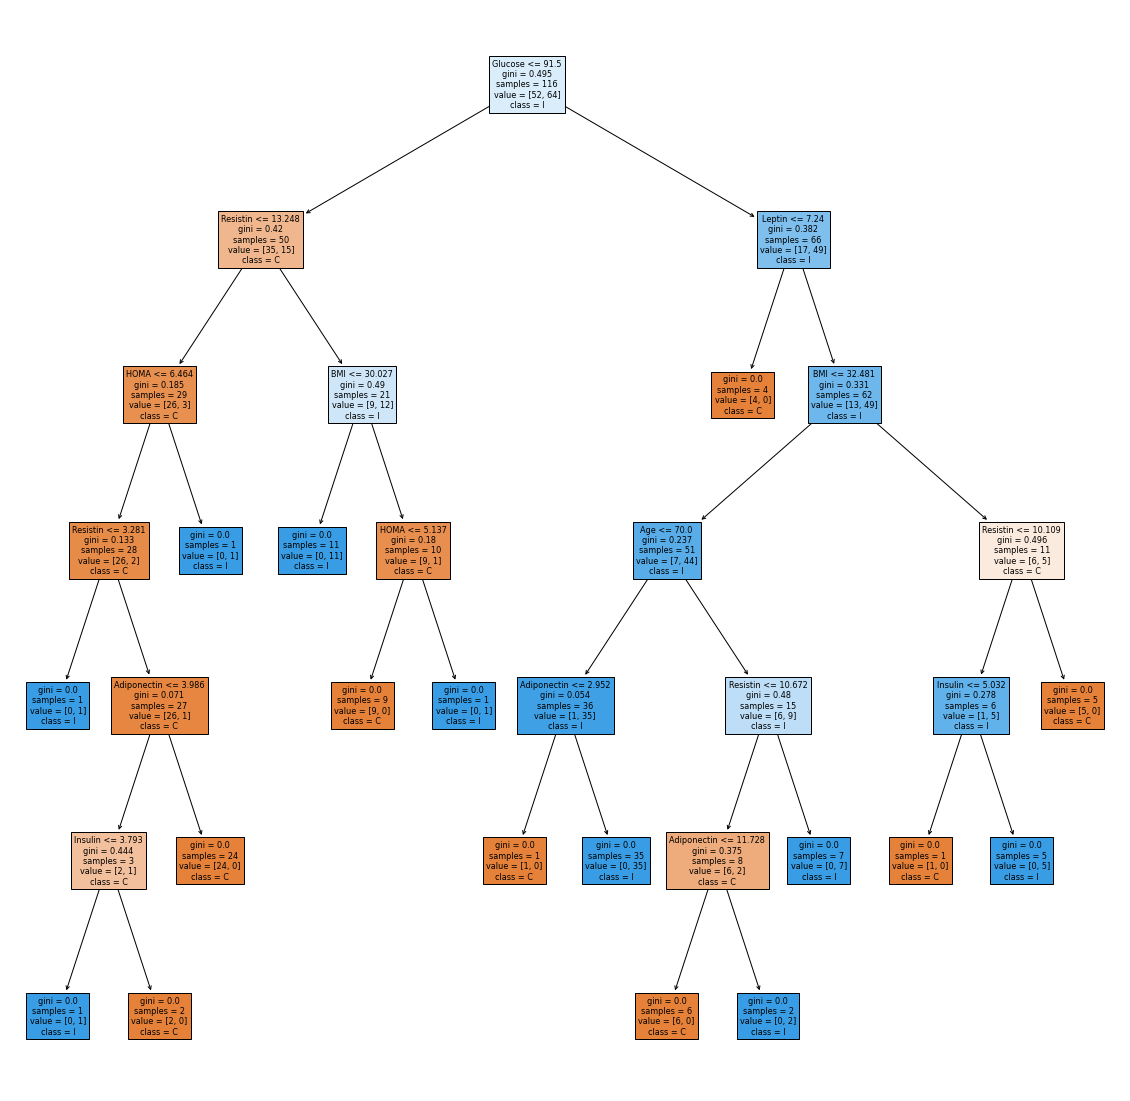

In [55]:
# memanggil library matplotlib dan memanggil fungsi pyplot untuk membuat visualisasi dari tree
from matplotlib import pyplot as plt
# membuat konfigurasi dari tree
fig = plt.figure(figsize=(20,20)) #ukuran tree
trees = tree.plot_tree(clf, feature_names=list(dataset.columns.values)[:9], class_names=list(dataset.columns.values)[9], filled=True) #bentuk tree diambil dari variable clf dan nama fitur diambil dari kolom 0-8 dan nama class diambil dari kolom ke 9

menghitung nilai akurasi dari data latih dan data uji

In [64]:
print("Score data latih :", clf_tree.score(X_train_scaled, y_train))
print("Score data uji   :", clf_tree.score(X_test_scaled, y_test))

Score data latih : 1.0
Score data uji   : 0.7083333333333334


dari hasil yang sudah dihitung, dapat diketahui bahwa dengan menggunakan Metode Decission Tree saat data latih mendapatkan score sempurna, tetapi score data ujinya menurun